In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


# **5.1 Precarga de los datos en Keras**



In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data();

11490434/11490434 [==============================] - 1s 0us/step


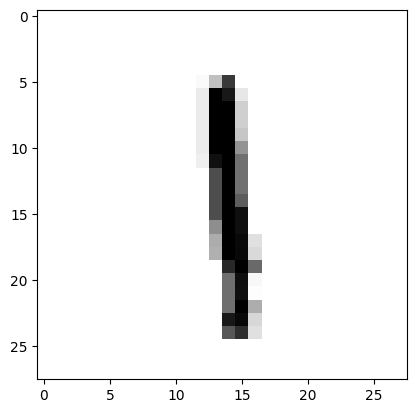

In [3]:
import matplotlib.pyplot as plt
# Mostramos la muestra número 8 de nuestro conjunto de datos
plt.imshow(x_train[8],cmap=plt.cm.binary)

Mostramos la etiqueta que le corresponde a la muestra 8, como se trata de un aprendizaje supervisado, los datos de entrenamiento tiene que estar etiquetados.

In [4]:
print(y_train[8])

1


In [5]:
print(x_train.ndim)

3


In [6]:
print(x_train.shape)

(60000, 28, 28)


Podemos ver como nuestro conjunto de entrenamiento, esta formado por
60000 matrices 2D de 28x28 pixeles, si en lugar de estar en blanco y negro, fuesen imagenes de color tendriamos un campo mas, el canal que represneraria el color de la imagen.

>
En General la estructura que encontraremos para imagenes  es **(samples,height,width,chnels)**, para videos la estructura general que vamos a encontrar es **(samples,frames,height,width,channels)**

In [7]:
subset=x_train[1:100:,:]
print(subset.shape)

(99, 28, 28)


# **5.2 Preprocesado de Datos**

>
En general, siempre hay un proceso de preprocesamiento de datos, con el objetivo de adaptarlos a un formato que permita un mejor aprovechamiento de estos por parte de las redes neuronales
Algunos ejemplos son :


1.   Vectroización
2.   Normalización
3.   Extracción de características




En nuestro caso, tenemos imagenes de 28x28 píxeles que se representan como una matriz de números entre [0,255] de tipo uint8.
En nuestro caso, lo que vamos a hacer va a ser **escalar los valores de entrada** para la red neuronal para obtener un mejor rendimiento.
Los vamos a escalar a valores de tipo float32 dentro de un rango [0,1]

In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

El siguente cambio, consiste en cambiar la **forma de los tensores**.
Vamos a transformar el tensor entrada(imagen) de 2D a un vector de 1D, es decir la matriz de 28x28 píxeles se puede representar con un array de 784 números

In [10]:
print(x_train.shape)

(60000, 28, 28)


In [11]:
print(x_test.shape)

(10000, 28, 28)


In [12]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


El siguiente cambio que debemos realizar, consiste en modificar las etiquetas que tenemos. Actualmente una etiqueta es un número entre 0 y 9 que representa la clase a la que corresponde el dígito, nuestro objetivo es convertir la etqiqueta en un vector de 10 posiciones , con 0 en todas las poisciones, excepto en el indice del dígito que tendremos un uno, esto se conoce como, codificación one-hot

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
print(y_train[0])

5


In [15]:
print(y_test[0])

7


In [16]:
print(y_train.shape)

(60000,)


In [17]:
print(y_test.shape)

(10000,)


In [18]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10);
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# **5.3 Definiendo el Modelo**
>
En este ejemplo, usaremos la estructura básica de Keras, la clase Sequential, que nos permitirá crear una red neurnonal básica.
Nuestro modelo, va a estar formado por 2 capas, en cada una tenedremos 10 neuronas.
>
La primera capa, impementará la función de activación sigmoide y va a recibir 784 entradas, una para cada uno de los 784 píxeles de la imagen.

>
La seguna capa, implementará la función de activación softmax, es decir, devolverá una matriz de 10 valores de probabilidad que represetan los 10 digitos posibles, y va a recibir las salidas de la capa anterior, está capa también contará con 10 neuronas.
>
En general, la capa de salida tendrá tantas neuronas como clases, excepto en una clasificación binaria, que solo necestia una neurona.


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Podemos observar que para realizar este ejemplo, necesitamos 7960 parámetros, veamos de donde salen.
>
En la primera capa, tenemos 784 entradas, como hay 10 neuronas, tenemos 784+784+784+...+784 = 10*784 = 7840, pero hay que sumarle el bias, por lo tanto, 7840+1+1+1+1+...+1= 7840+10=7850.
>
En la segunda capa, cada neurona recibe la salida de las neuronas de la capa anterior, es decir cada una recibe 10 entradas, luego tenemos 10+10+...+10 = 10 * 10 = 100 parámetros, mas 10 de bias son 110.
>
En total tenemos 7850+110 = 7960 parámetros


# **5.4 Configuración del proceso de aprendizaje**
>
El método compile nos permite configurar los parámetros para entrenar el modelo.
En  trabajos posteriores entreaemos mas en detalle sobre estos parámetros, otros parámetros que podemos usar y el impacto que estos tienen sobre el resultado final.
>
En el ejemplo, los parámetros que usamos son

*   loss = categorical_crossentropy
*   optimizer=sgd(stocastic gradient descendent)
*   metrics=accuracy, son las métricas que usamos para monitorear el arpendizaje






In [22]:
model.compile(loss="categorical_crossentropy",
              optimizer = "sgd",
              metrics = ['accuracy'])

# **5.5 Entrenamiento**
>
Para entrenar un modelo, debemos incocar el método fit.
La idea intuitiva es la siguiente, con el algoritmo que hemos especificado en la declaración del modelo, en nuestro caso sgd,escojemos datos del conjunto de entrenamiento x_train y los pasamos a la red neuronal para comparar el resultado obtenido con el esperado, indicado en y_train, y calculamos la loss con la función que habiamos definido en el modelo, el objetivo será ajustar el valor de los pesps y el sesgo para reducir la perdida, este proceso lo repetimos iterativamente, hasta que hemos conseguido ajustar los valores del peso y del sesgo.

In [24]:
model.fit(x_train,y_train,epochs=8);

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5868 - accuracy: 0.8638
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5352 - accuracy: 0.8722
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4964 - accuracy: 0.8791
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4664 - accuracy: 0.8853
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4428 - accuracy: 0.8888
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4238 - accuracy: 0.8918
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4084 - accuracy: 0.8940
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3953 - accuracy: 0.8967


# **5.6 Evaluación del modelo**
>
Una vez hemos entrenado el modelo, vamos a pasarle entradas que aun no ha visto y montirizar su rendimiento, el objetivo será ver la precisión del modelo, esto es para este ejmplo particular, en otros ejemplos será necesario ver otras metricas y que la precisión por si sola puede no ser suficiente.
>
Recordemos que precisión, accuracy representa el numero de muestras que han sido clasificadas correctamente, dependiendo del caso nos será necesarió estudidar también los falsos negativos o falsos positivos.


In [25]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy : ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.9009
Test accuracy :  0.9009000062942505


In [26]:
# Look at confusion matrix
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step


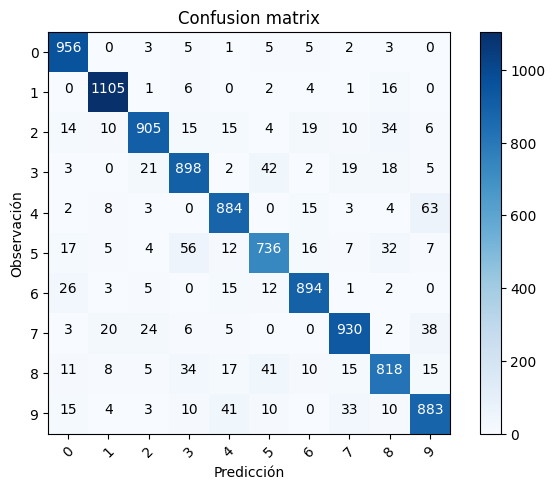

In [27]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

Recordemos como se lee esta matriz de confusión.
Podemos ver que m[0,2]=3, esto quiere decir que hay 3 0 que han sido clasificados como 2, para el 0 esto son 3 falsos negativos, ya que ha dicho que no era un 0 cuando si lo es y para el 2 son 3 falsos positivos, porque ha dichi que si que es un 2 cuando no lo es.

# **5.7 Generación de predicciones**

Una vez hemos entrenado el modelo, estamos en condiciones de realizar predicciones con nuevos datos de entrada, para ello debemos usar el método predict.

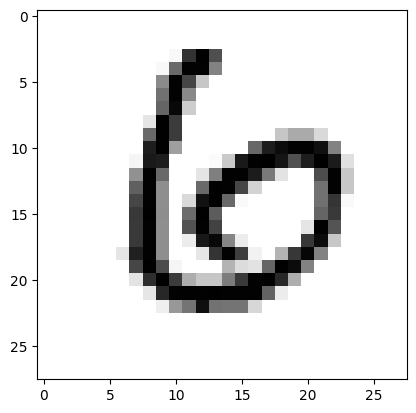

In [29]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)


In [30]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
np.argmax(predictions[11])

6

In [32]:
print(predictions[11])

[1.8956097e-02 1.2882175e-03 8.6450331e-02 4.9172454e-03 5.3649120e-02
 5.6357519e-03 7.7354485e-01 3.9933727e-04 4.4985555e-02 1.0173458e-02]


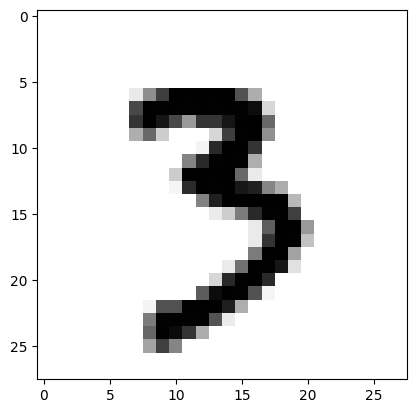

In [39]:
plt.imshow(x_test_old[30], cmap=plt.cm.binary)


In [40]:
np.argmax(predictions[30])

3